In [2]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestrado2NOTA',
        user = "root",
        passwd = "admin"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)
    

In [3]:
from igraph import *
from pandas import DataFrame
import pandas as pd
import plotly.express as px

In [4]:
select_query = "select id_student, student_semester , name from student_course_subject SCS INNER JOIN subjects S on SCS.id_subject = S.id;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

In [5]:
unique = records['name'].drop_duplicates()

In [6]:
graph = {}
students = records['id_student'].drop_duplicates()
for i in students:
    maxSemester = max(records.loc[records['id_student'] == i, 'student_semester'].to_list())
    maxSemester = maxSemester - 1
    for semester in range(1, maxSemester):
        value = records.loc[(records['id_student'] == i) & (records['student_semester'] == semester), 'name'].to_list()
        nextValue = records.loc[(records['id_student'] == i) & (records['student_semester'] == semester + 1), 'name'].to_list()
    
# #     print(i, value, nextValue)
    
        for v in value:
            try:
                aux = graph[v]
                for nv in nextValue:
                    if not nv in aux:
                        aux.append(nv)
                graph[v] = aux
            except:
                graph[v] = nextValue

    
    

In [7]:
graph

{'ALGORITMOS E PROGRAMACAO DE COMPUTADORES': ['ESTRUTURAS DE DADOS',
  'LOGICA COMPUTACIONAL 1',
  'TOPICOS AVANCADOS EM COMPUTADORES',
  'CIRCUITOS DIGITAIS',
  'INFORMATICA E SOCIEDADE',
  'INTRODUCAO AOS SISTEMAS COMPUTACIONAIS',
  'FUNDAMENTOS TEORICOS DA COMPUTACAO',
  'PROGRAMACAO SISTEMATICA',
  'ALGORITMOS E PROGRAMACAO DE COMPUTADORES',
  'CIRCUITOS LOGICOS',
  'LABORATORIO DE CIRCUITOS LOGICOS',
  'TECNICAS DE PROGRAMACAO 1',
  'METODOS DE PESQUISA NA LICENCIATURA EM COMPUTACAO',
  'INTRODUCAO A CIENCIA DA COMPUTACAO',
  'SINAIS E SISTEMAS',
  'INTRODUCAO A ENGENHARIA DE COMPUTACAO',
  'INTRODUCAO AO PROCESSAMENTO DE IMAGENS',
  'REDES DE COMPUTADORES',
  'ESTUDOS EM COMPUTACAO MULTIMIDIA',
  'INTRODUCAO A MICROINFORMATICA',
  'ORGANIZACAO E ARQUITETURA DE COMPUTADORES',
  'TOPICOS ESPECIAIS EM INFORMATICA NA EDUCACAO',
  'ESTUDOS EM SISTEMAS DE INFORMACAO',
  'PROCESSAMENTO DE SINAIS MULTIMIDIA',
  'BANCOS DE DADOS',
  'ENGENHARIA DE SOFTWARE',
  'PROJETO E ANALISE DE ALGORI

In [8]:
index_dict = {}
index = 0
for key in graph:
    index_dict[key] = index
    index = index + 1

# grafo de 1 matéria

In [60]:
key = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES'
g = Graph()
# g.add_vertices(index)
# g.vs['name'] = graph[key]
# key_index = index_dict[key]
g.add_vertices(1)
g.vs[0]['name'] = key
index = 0
for value in graph[key]:
    index = index + 1
    try:
        g.add_vertices(1)
        g.vs[index]['name'] = value
        g.add_edges([(0, index)])
    except Exception as e:
        print(value, index)
        print(e)
#             print(key, key_index)
#             print(value, value_index)

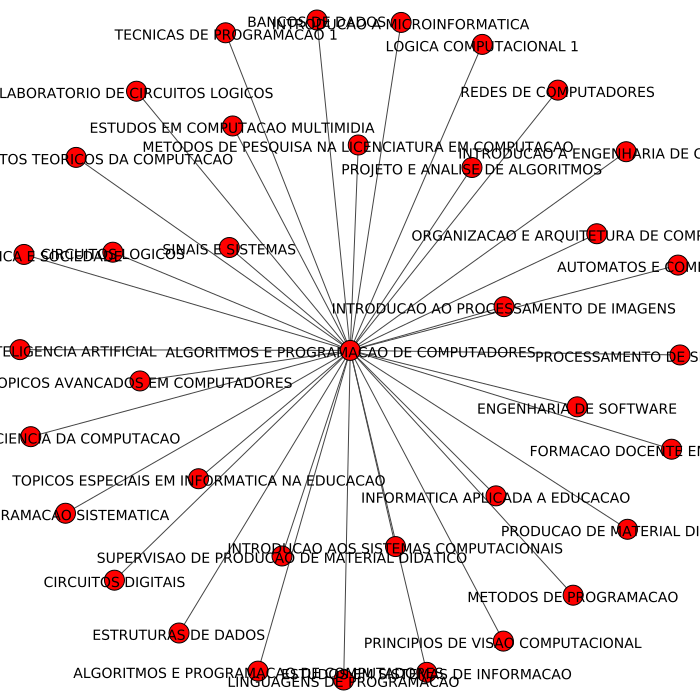

In [62]:

layout = g.layout("kk")
g.vs["label"] = g.vs["name"]
plot(g, layout = layout, bbox = (700, 700), margin = 20)

# grafo de todas as matérias

In [65]:
g = Graph()
father_index = 0
for key in graph:
    g.add_vertices(1)
    g.vs[father_index]['name'] = key
    index = father_index
    for value in graph[key]:
        index = index + 1
        try:
            g.add_vertices(1)
            g.vs[index]['name'] = value
            g.add_edges([(father_index, index)])
        except Exception as e:
            print(value, index)
            print(e)
    father_index = index + 1

In [66]:
#grande e complexo demais p plotar
print(g)

IGRAPH UN-- 6434 6315 --
+ attr: name (v)
+ edges (vertex names):
MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE REDES--BANCOS DE DADOS, MODELAGEM DE
SISTEMAS COMPUTACIONAIS E DE REDES--ENGENHARIA DE SOFTWARE, MODELAGEM DE
SISTEMAS COMPUTACIONAIS E DE REDES--ESTAGIO SUPERVISIONADO EM ENGENHARIA DE
COMPUTACAO 1, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE REDES--LINGUAGENS DE
PROGRAMACAO, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE REDES--ORGANIZACAO E
ARQUITETURA DE COMPUTADORES, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--TELEINFORMATICA E REDES 1, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--METODOS DE PROGRAMACAO, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--SINAIS E SISTEMAS, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--LOGICA COMPUTACIONAL 1, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--SISTEMAS DE INFORMACAO, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--CIRCUITOS DIGITAIS, MODELAGEM DE SISTEMAS COMPUTACIONAIS E DE
REDES--INTERACAO HUMANO COMPUTADOR, MODELAGEM DE S